# Part I - Ford GoBike System Data
## by KhoiVN

## Introduction
> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consists of 183,412 rows and 16 columns. The attributes included the trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, bike share for all trip, and rental access method. The dataset can be downloaded from [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv).


## Preliminary Wrangling


In [1]:
!pip install numpy==1.24.4 pandas==2.0.3 matplotlib==3.7.3 seaborn==0.13.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Gather data

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


## Assess data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Clean data

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

### Wrong data type

In [8]:
df['start_station_id'] = df['start_station_id'].astype('int64')
df['end_station_id'] = df['end_station_id'].astype('int64')

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['user_type'] = df['user_type'].astype('category')
df['member_birth_year'] = df['member_birth_year'].astype('int64')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')

## Feature engineering

In [9]:
df['member_age'] = 2019 - df['member_birth_year']
df['start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')
df['start_hour'] = df['start_time'].dt.strftime('%H')
df['start_day'] = df['start_time'].dt.strftime('%A')
df['start_month'] = df['start_time'].dt.strftime('%B')
df['end_date'] = df['end_time'].dt.strftime('%Y-%m-%d')
df['end_hour'] = df['end_time'].dt.strftime('%H')
df['end_day'] = df['end_time'].dt.strftime('%A')
df['end_month'] = df['end_time'].dt.strftime('%B')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,No,35,2019-02-28,17,Thursday,February,2019-03-01,08,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,No,47,2019-02-28,12,Thursday,February,2019-03-01,05,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,No,30,2019-02-28,17,Thursday,February,2019-03-01,04,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Yes,45,2019-02-28,23,Thursday,February,2019-03-01,00,Friday,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,No,60,2019-02-28,23,Thursday,February,2019-03-01,00,Friday,March


In [12]:
def check_unique(df, columns=None):
    for col in columns if columns else df.columns:
        print(col, df[col].unique())

check_unique(df=df, columns=['member_gender', 'user_type', 'start_month', 'end_month'])

member_gender ['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']
user_type ['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']
start_month ['February']
end_month ['March' 'February']


### What is the structure of your dataset?

> The dataset Ford GoBike System has CSV format and contain 183412 rows and 16 columns.

After cleaning data and feature engineering, the dataset has 174952 rows and 25 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in this dataset are `age` and `gender` of user, `duration` of trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features can help support my interest features are `member_birth_year`, `member_gender`, `duration_sec`, `start_time`, `end_time`.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


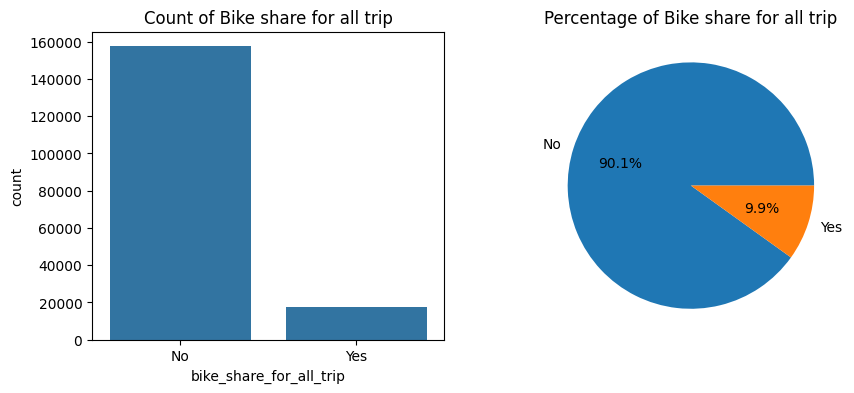

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].set_title('Count of Bike share for all trip')
sb.countplot(x=df['bike_share_for_all_trip'], ax=ax[0]);
ax[1].set_title('Percentage of Bike share for all trip')
ax[1].pie(df['bike_share_for_all_trip'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%');

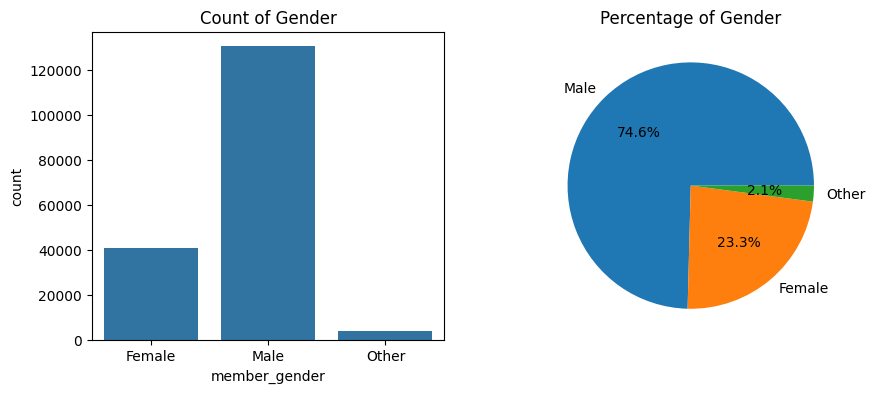

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].set_title('Count of Gender')
sb.countplot(x=df['member_gender'], ax=ax[0]);
ax[1].set_title('Percentage of Gender')
ax[1].pie(df['member_gender'].value_counts(), labels=['Male', 'Female', 'Other'], autopct='%1.1f%%');

In [15]:
def plot_chart(df=None, x=None, y=None, hue=None, type="bar", title=None, xlabel=None, ylabel=None, xticks=None, yticks=None):
    if type == "bar":
        sb.barplot(x=x, y=y, hue=hue, data=df)
    elif type == "line":
        sb.lineplot(x=x, y=y, hue=hue, data=df)
    elif type == "pie":
        plt.pie(df[y], labels=df[x], autopct='%1.1f%%')
    elif type == "count":
        sb.countplot(x=x, y=y, hue=hue, data=df)
    elif type == "scatter":
        sb.scatterplot(x=x, y=y, hue=hue, data=df)
    elif type == "box":
        sb.boxplot(x=x, y=y, hue=hue, data=df)
    elif type == "violin":
        sb.violinplot(x=x, y=y, hue=hue, data=df)
    elif type == "hist":
        plt.hist(x=x, data=df, bins=200)
    elif type =="reg":
        sb.regplot(x=x, y=y, data=df)
    else:
        raise Exception("Invalid type")
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.title(label=title)
    if xticks:
        plt.xticks(ticks=xticks, labels=[str(x) for x in xticks])
        plt.xscale('log')
    if yticks:
        plt.yticks(ticks=yticks, labels=[str(y) for y in yticks])
        plt.yscale('log')
    plt.show()

In [16]:
start_station_df = df.copy()
start_station_df = start_station_df['start_station_name'].value_counts(sort=True).reset_index(name='number_of_trips')[:10]
start_station_df

,start_station_name,number_of_trips
0,Market St at 10th St,3649
1,San Francisco Caltrain Station 2 (Townsend St...,3408
2,Berry St at 4th St,2952
3,Montgomery St BART Station (Market St at 2nd St),2711
4,Powell St BART Station (Market St at 4th St),2620
5,San Francisco Caltrain (Townsend St at 4th St),2577
6,San Francisco Ferry Building (Harry Bridges Pl...,2541
7,Howard St at Beale St,2216
8,Steuart St at Market St,2191
9,Powell St BART Station (Market St at 5th St),2144


In [17]:
start_station_name = start_station_df['start_station_name'].tolist()
number_of_trips_end_station = start_station_df['number_of_trips'].tolist()

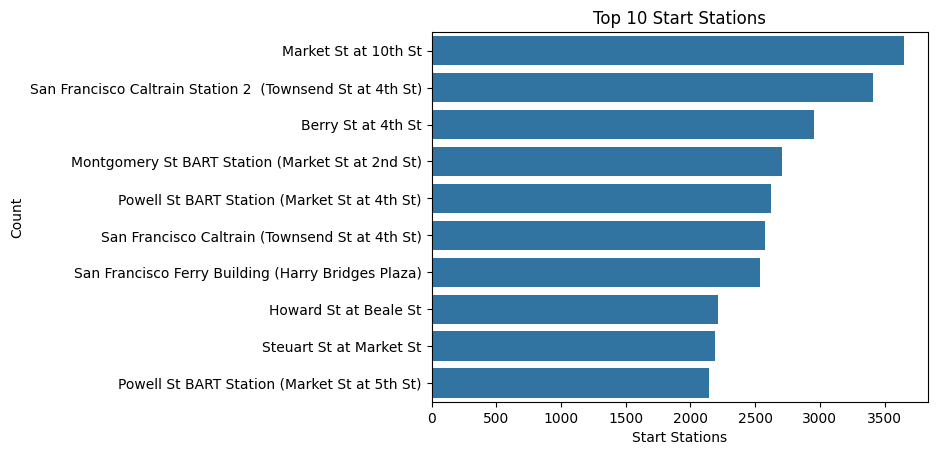

In [18]:
plot_chart(x=number_of_trips_end_station, y=start_station_name, type='bar', title='Top 10 Start Stations', xlabel='Start Stations', ylabel='Count')

In [19]:
end_station_df = df.copy()
end_station_df = end_station_df['end_station_name'].value_counts(sort=True).reset_index(name='number_of_trips')[:10]
end_station_df

,end_station_name,number_of_trips
0,San Francisco Caltrain Station 2 (Townsend St...,4624
1,Market St at 10th St,3709
2,Montgomery St BART Station (Market St at 2nd St),3461
3,San Francisco Ferry Building (Harry Bridges Pl...,3151
4,San Francisco Caltrain (Townsend St at 4th St),2870
5,Powell St BART Station (Market St at 4th St),2854
6,Berry St at 4th St,2782
7,The Embarcadero at Sansome St,2341
8,Steuart St at Market St,2264
9,Powell St BART Station (Market St at 5th St),2153


In [20]:
end_station_name = end_station_df['end_station_name'].tolist()
number_of_trips = end_station_df['number_of_trips'].tolist()

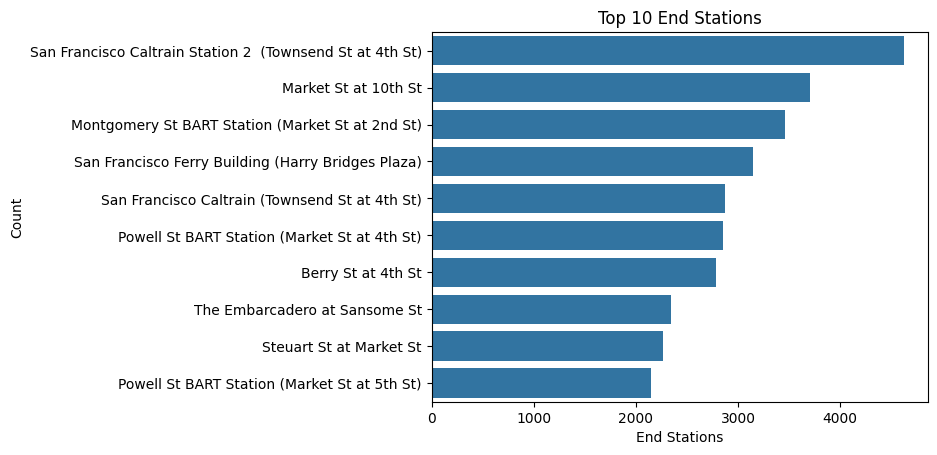

In [21]:
plot_chart(x=number_of_trips, y=end_station_name, type='bar', title='Top 10 End Stations', xlabel='End Stations', ylabel='Count')

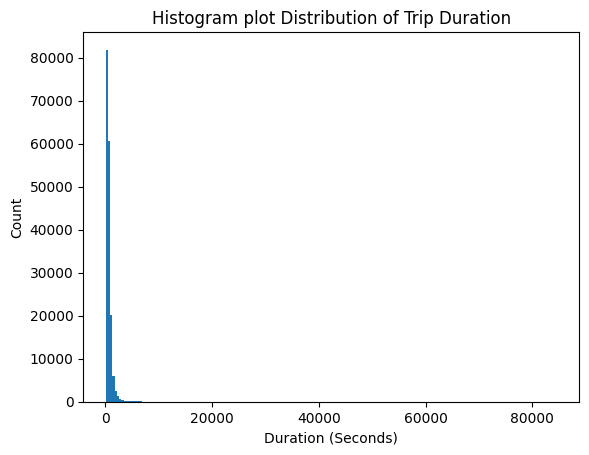

In [22]:
plot_chart(df=df, x='duration_sec', type='hist', title='Histogram plot Distribution of Trip Duration', xlabel='Duration (Seconds)', ylabel='Count')

/var/folders/33/stqg6xn125x2rxkfsph8xl380000gn/T/ipykernel_4169/2878031166.py:2: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e4)


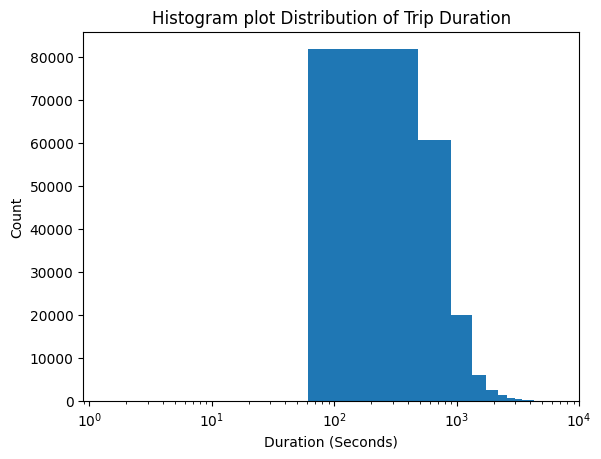

In [23]:
plt.xscale('log')
plt.xlim(0, 1e4)
plot_chart(df=df, x='duration_sec', type='hist', title='Histogram plot Distribution of Trip Duration', xlabel='Duration (Seconds)', ylabel='Count')

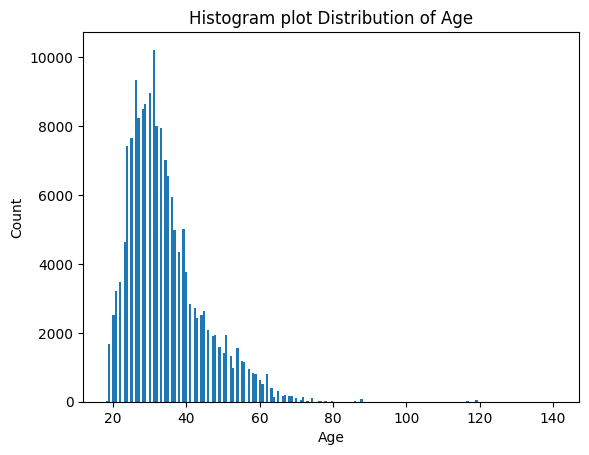

In [24]:
plot_chart(df=df, x='member_age', type='hist', title='Histogram plot Distribution of Age', xlabel='Age', ylabel='Count')

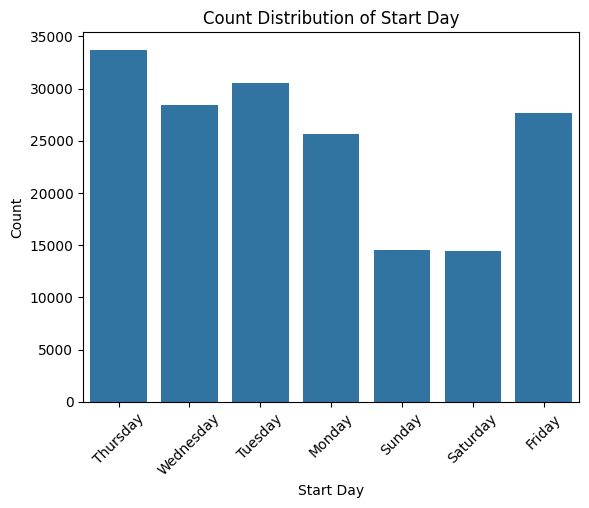

In [25]:
plt.xticks(rotation=45)
plot_chart(df=df, x='start_day', type='count', title='Count Distribution of Start Day', xlabel='Start Day', ylabel='Count')

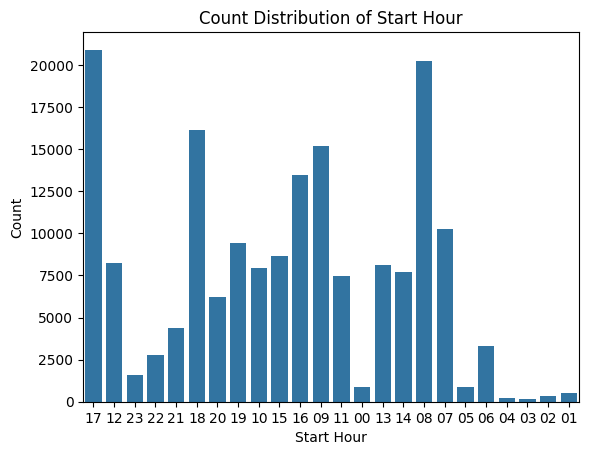

In [26]:
plot_chart(df=df, x='start_hour', type='count', title='Count Distribution of Start Hour', xlabel='Start Hour', ylabel='Count')

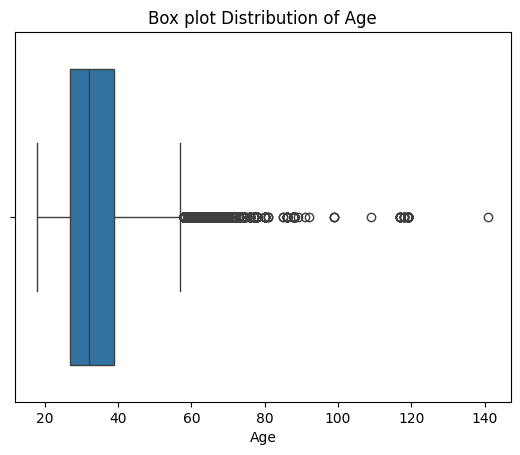

In [27]:
plot_chart(df=df, x='member_age', type='box', title='Box plot Distribution of Age', xlabel='Age')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Regarding the duration, the curve of the duration is right skewed, so I used a logarithmic scale transformation and added an x-axis limit to focus on the most frequent interval.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The percentage of using bike share for all trip is 10.1%.

> The percentage of gender are 74.6% for male, 23.3% for female and others. So, almost users share bike for all trips are male.

> Almost users are 20-40 years old.

> Regarding the `Start Hour`, the curve is bimodal showing that the most common periods of the day when trips start are 7-9 am and 4-6 pm.

> Regarding the `Start Day`, the curve is unimodal showing that users use the bike more on weekdays than weekends.

> Regarding the `Station`, `San Francisco Caltrain (Townsend St at 4th St)` and `Market St at 10th St` are the most popular stations for starting and ending trips.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

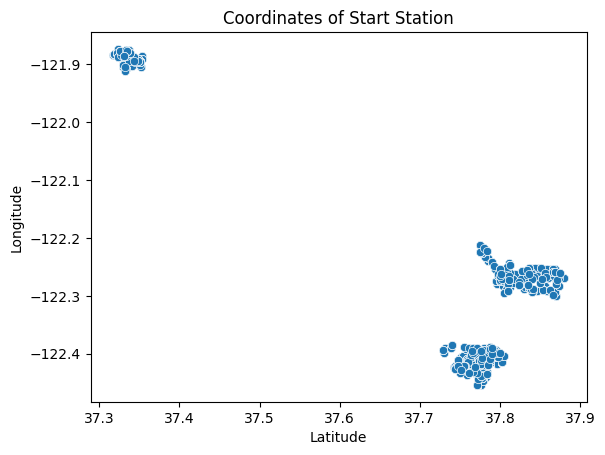

In [28]:
plot_chart(df=df, x='start_station_latitude', y='start_station_longitude', type='scatter', title='Coordinates of Start Station', xlabel='Latitude', ylabel='Longitude')

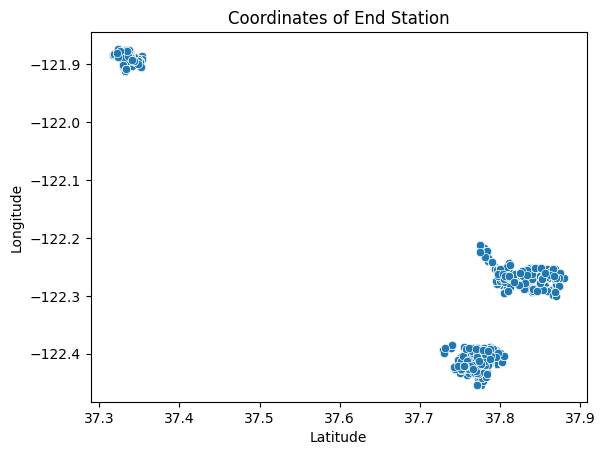

In [29]:
plot_chart(df=df, x='end_station_latitude', y='end_station_longitude', type='scatter', title='Coordinates of End Station', xlabel='Latitude', ylabel='Longitude')

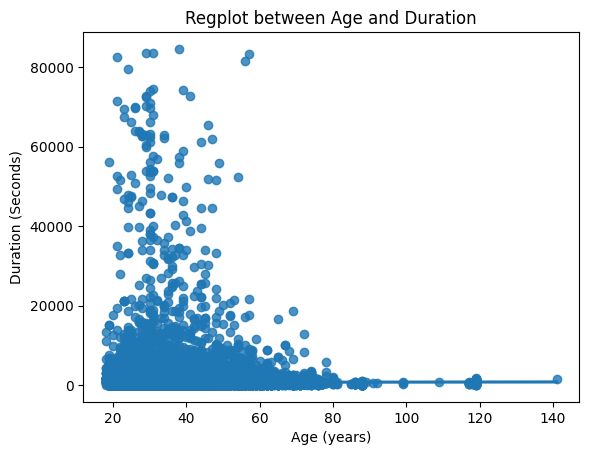

In [30]:
plot_chart(df=df, x='member_age', y='duration_sec', type='reg', title='Regplot between Age and Duration', xlabel='Age (years)', ylabel='Duration (Seconds)')

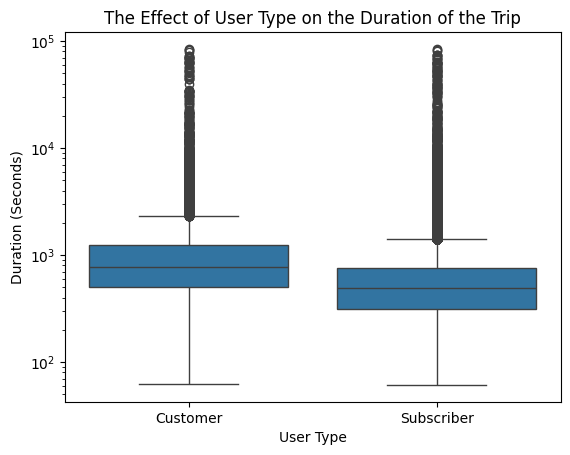

In [31]:
plot_chart(df=df, x='user_type', y='duration_sec', type='box', title='The Effect of User Type on the Duration of the Trip', xlabel='User Type', ylabel='Duration (Seconds)', yticks=[100, 200, 500, 1e3, 2e3, 5e3, 1e4])

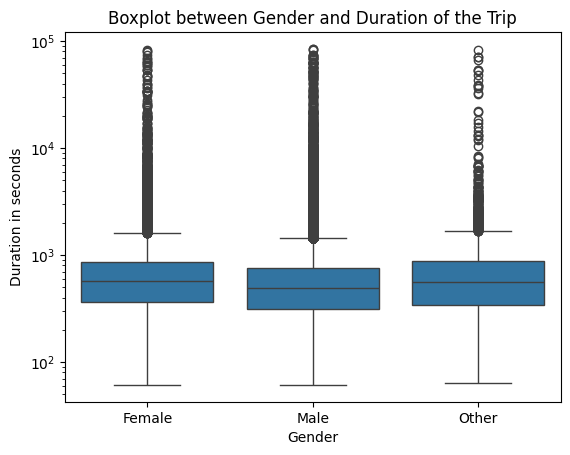

In [32]:
plot_chart(df=df, x='member_gender', y='duration_sec', type='box', title='Boxplot between Gender and Duration of the Trip', xlabel='Gender', ylabel='Duration in seconds', yticks=[100, 200, 500, 1e3, 2e3, 5e3, 1e4])

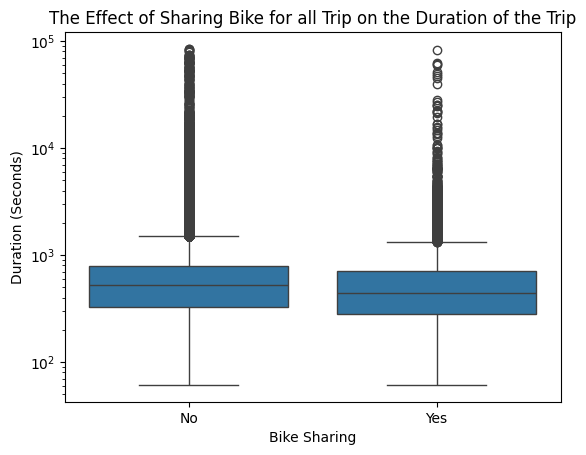

In [33]:
plot_chart(df=df, x='bike_share_for_all_trip', y='duration_sec', type='box', title='The Effect of Sharing Bike for all Trip on the Duration of the Trip', xlabel='Bike Sharing', ylabel='Duration (Seconds)', yticks=[100, 200, 500, 1e3, 2e3, 5e3, 1e4])

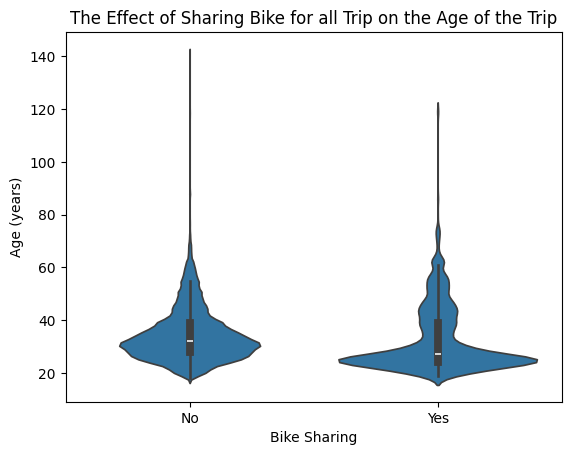

In [34]:
plot_chart(df=df, x='bike_share_for_all_trip', y='member_age', type='violin', title='The Effect of Sharing Bike for all Trip on the Age of the Trip', xlabel='Bike Sharing', ylabel='Age (years)')

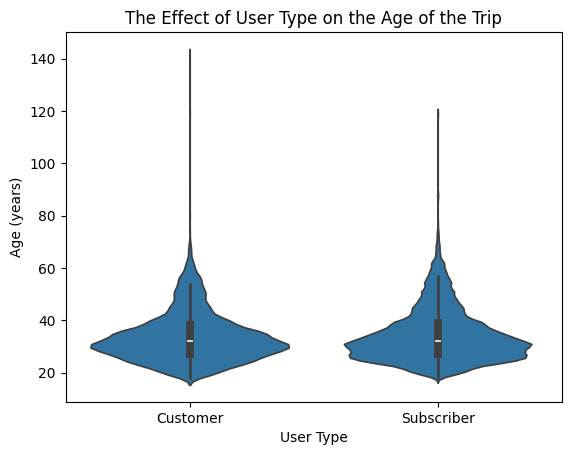

In [35]:
plot_chart(df=df, x='user_type', y='member_age', type='violin', title='The Effect of User Type on the Age of the Trip', xlabel='User Type', ylabel='Age (years)')

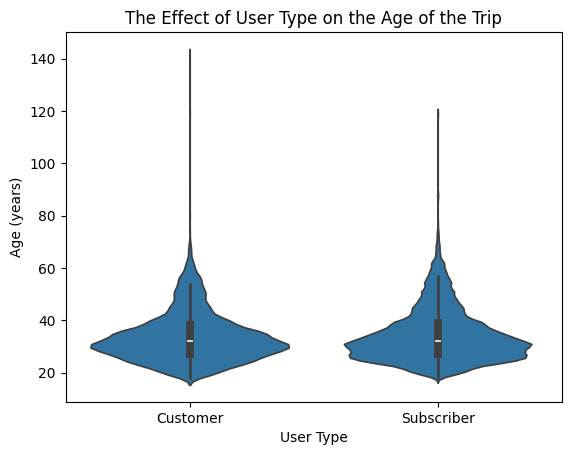

In [36]:
plot_chart(df=df, x='user_type', y='member_age', type='violin', title='The Effect of User Type on the Age of the Trip', xlabel='User Type', ylabel='Age (years)')

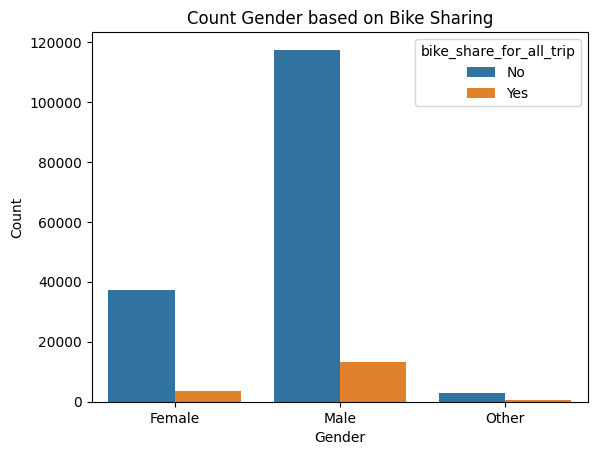

In [37]:
plot_chart(df=df, x='member_gender', hue='bike_share_for_all_trip', type='count', title='Count Gender based on Bike Sharing', xlabel='Gender', ylabel='Count')

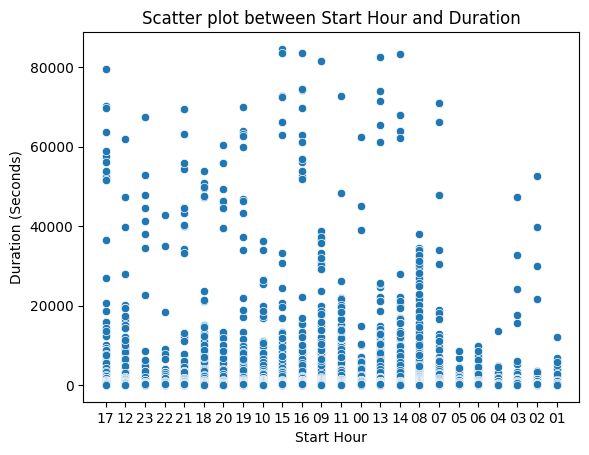

In [38]:
plot_chart(df=df, x='start_hour', y='duration_sec', type='scatter', title='Scatter plot between Start Hour and Duration', xlabel='Start Hour', ylabel='Duration (Seconds)')

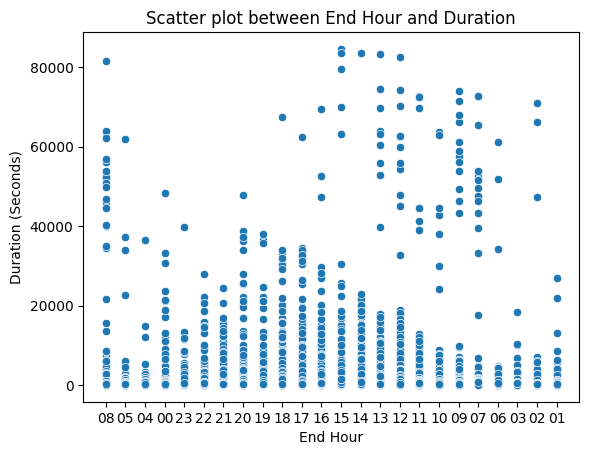

In [39]:
plot_chart(df=df, x='end_hour', y='duration_sec', type='scatter', title='Scatter plot between End Hour and Duration', xlabel='End Hour', ylabel='Duration (Seconds)')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration of the trip is inversely related to the age. The younger the user, the longer the trip.

> `Subscribers` tend to have longer trips than customers.

> The `start hour` and `end hour` are inversely related to less than 20k duration of the trip.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most users who share bikes are in the twenties of age.

> Bike sharing occurs only by subscribers which is intuitive.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

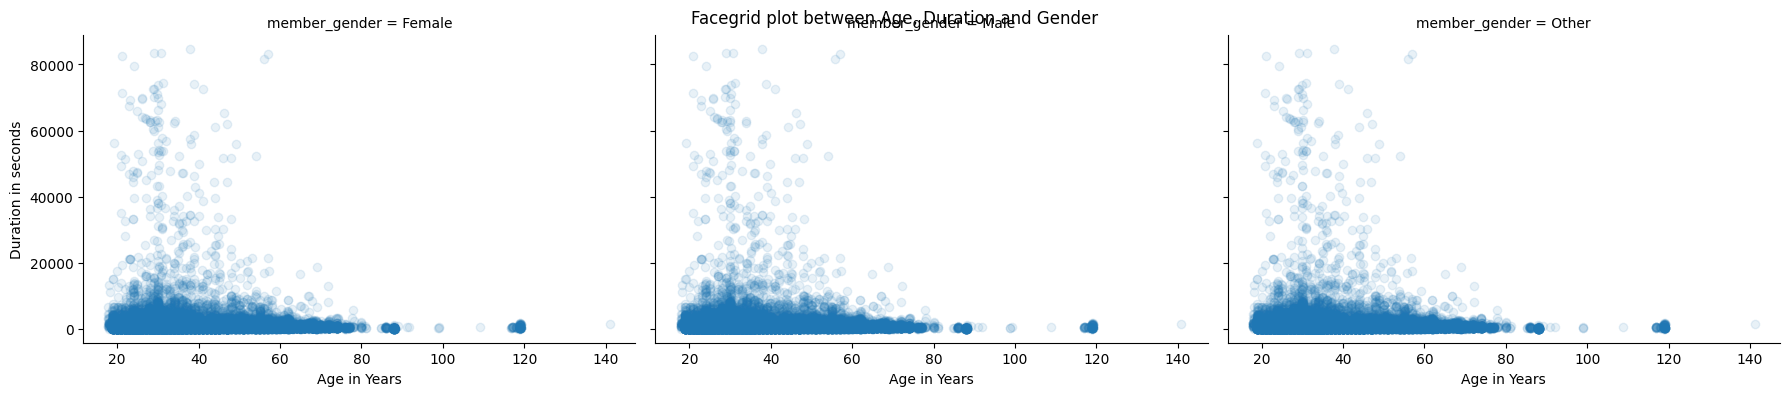

In [40]:
ax = sb.FacetGrid(data=df, col='member_gender', height=4, aspect=1.5)
ax.map(sb.regplot, data=df, x='member_age', y='duration_sec', fit_reg=False, x_jitter=0.2, y_jitter=0.2, scatter_kws={'alpha':1/10})
ax.set_axis_labels('Age in Years', 'Duration in seconds')
plt.suptitle('Facegrid plot between Age, Duration and Gender');

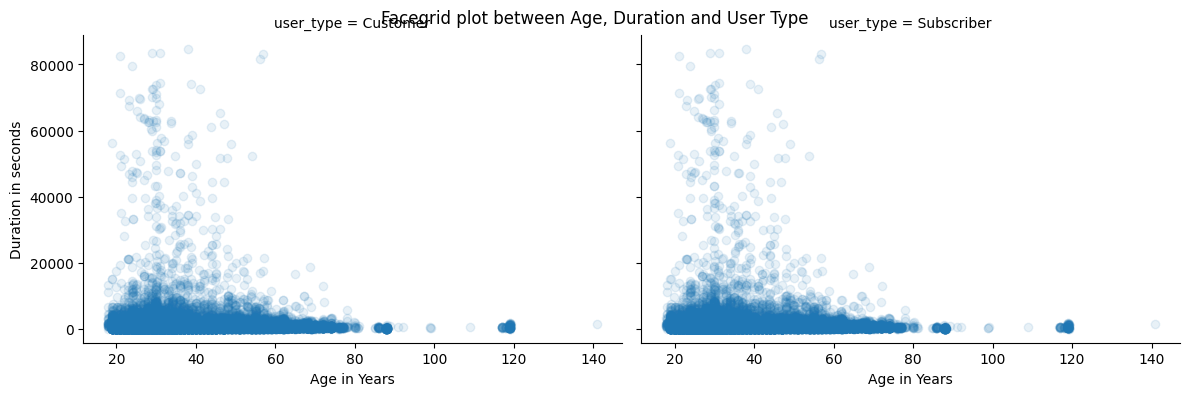

In [41]:
ax = sb.FacetGrid(data=df,col='user_type', height=4, aspect=1.5)
ax.map(sb.regplot, data=df, x='member_age', y='duration_sec', fit_reg=False, x_jitter=0.2, y_jitter=0.2, scatter_kws={'alpha':1/10})
ax.set_axis_labels('Age in Years', 'Duration in seconds')
plt.suptitle('Facegrid plot between Age, Duration and User Type');

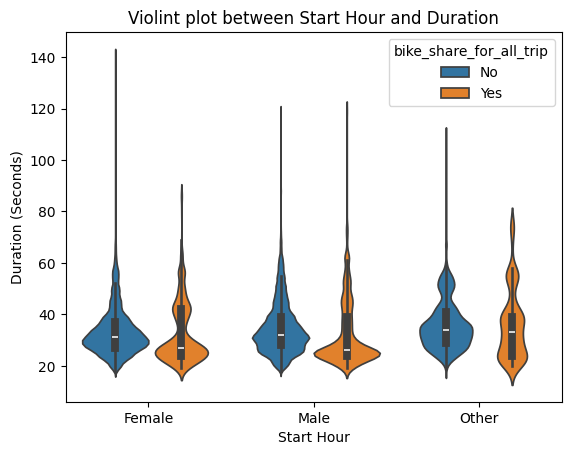

In [42]:
plot_chart(df=df, x='member_gender', y='member_age', hue='bike_share_for_all_trip', type='violin', title='Violint plot between Start Hour and Duration', xlabel='Start Hour', ylabel='Duration (Seconds)')

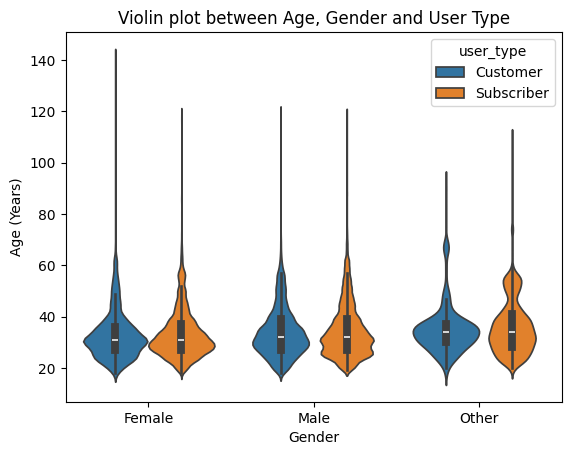

In [43]:
plot_chart(df=df, x='member_gender', y='member_age', hue='user_type', type='violin', title='Violin plot between Age, Gender and User Type', xlabel='Gender', ylabel='Age (Years)')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The duration of the trip is inversely related to the `age`. The younger the user, the longer the trip.

> The ratio of `customer` and `subscriber` is the same for all ages.

### Were there any interesting or surprising interactions between features?

> No

## Conclusions
To sum up, almost users who share bike for all trips are `Male` between `20-40` years old. The duration of the trip is inversely related to the age. The younger the user, the longer the trip. The ratio of `customer` and `subscriber` is the same for all ages. The most common periods of the day when trips start are 7-9 am and 4-6 pm. Users use the bike more on weekdays than weekends. `San Francisco Caltrain (Townsend St at 4th St)` and `Market St at 10th St` are the most popular stations for starting and ending trips. The percentage of using bike share for all trip is 10.1%.
